## Caffe Sales Project
Done By Abduallah Abuhassan (kaiozwald)

## Import Libraries

In [227]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report
import pickle

## Data Viewing

In [196]:
data = pd.read_csv('dirty_cafe_sales.csv')
data

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [198]:
profile = ProfileReport(data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

In [199]:
# show values in some cols
# data['Price Per Unit'].value_counts()
# data['Quantity'].value_counts()
# data['Item'].value_counts()

# func to clean data
def clean_data(data):
    # Replace 'ERROR', 'UNKNOWN', etc. with zeros then remove it
    null_data = data.replace({'ERROR': 0, 'UNKNOWN': 0, 'nan': 0, np.nan: 0})
    imp = SimpleImputer(missing_values=0, strategy='most_frequent')
    return pd.DataFrame(imp.fit_transform(null_data), columns=data.columns)

cleaned_data = clean_data(data)

In [200]:
cleaned_data.info()
cleaned_data = cleaned_data.drop('Transaction ID',axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              10000 non-null  object
 2   Quantity          10000 non-null  object
 3   Price Per Unit    10000 non-null  object
 4   Total Spent       10000 non-null  object
 5   Payment Method    10000 non-null  object
 6   Location          10000 non-null  object
 7   Transaction Date  10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB


In [201]:
profile = ProfileReport(cleaned_data, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## EDA

In [202]:
# Perform encoding on categorical data so we can see correlations and vis on data
categorical_labels = ['Item','Payment Method','Location']

def encode_data(data):
    encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_data = encoder.fit_transform(data[['Item', 'Payment Method', 'Location']])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
    return pd.concat([encoded_df, data.drop(['Item', 'Payment Method', 'Location'], axis=1)], axis=1)

data_encoded = encode_data(cleaned_data)
data_encoded.head()

D:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Takeaway,Quantity,Price Per Unit,Total Spent,Transaction Date
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2.0,4.0,2023-09-08
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,12.0,2023-05-16
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1.0,6.0,2023-07-19
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,5.0,10.0,2023-04-27
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2.0,4.0,2023-06-11


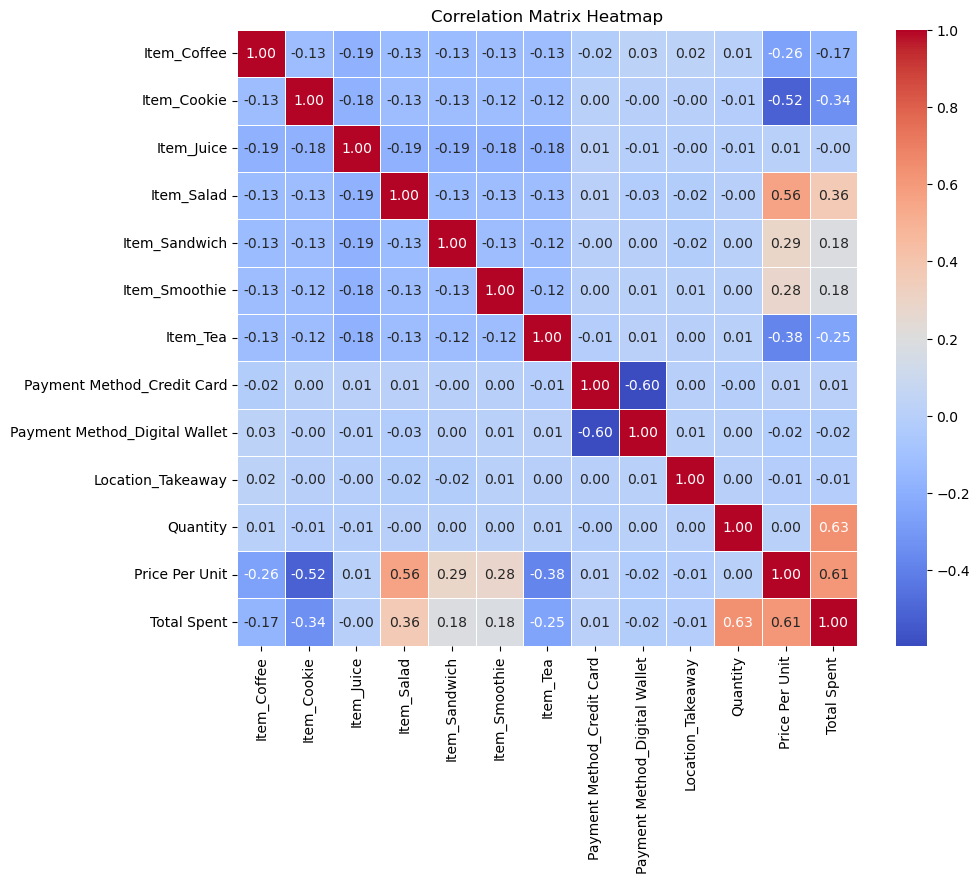

In [203]:
corr_data = data_encoded.drop('Transaction Date',axis=1)
correlation_matrix = corr_data.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix Heatmap")

plt.show()

## Outliers

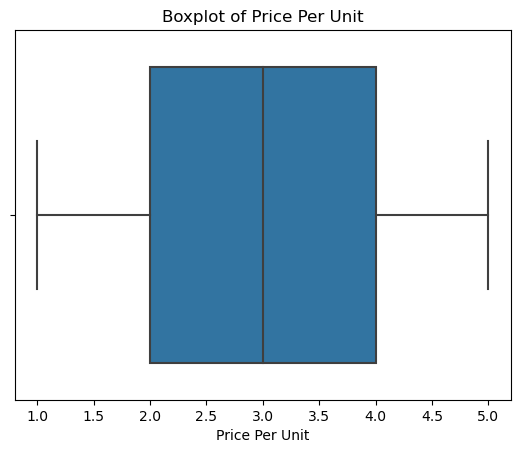

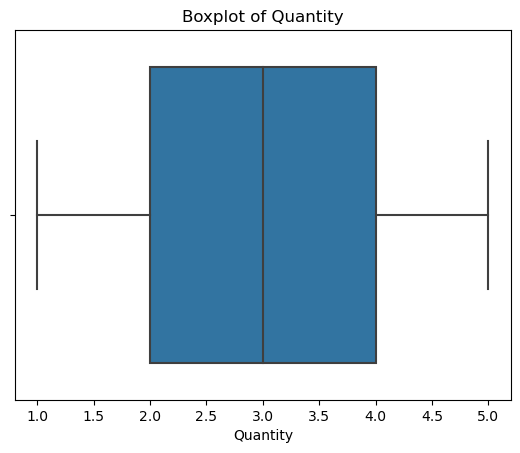

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


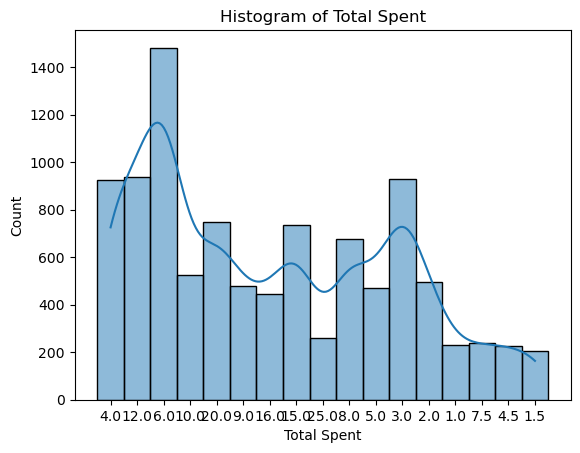

In [204]:
# Ensure the columns are numeric
corr_data['Price Per Unit'] = pd.to_numeric(corr_data['Price Per Unit'], errors='coerce')
corr_data['Quantity'] = pd.to_numeric(corr_data['Quantity'], errors='coerce')

sns.boxplot(x=corr_data['Price Per Unit'])
plt.title('Boxplot of Price Per Unit')
plt.show()

sns.boxplot(x=corr_data['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

sns.histplot(corr_data['Total Spent'], kde=True)
plt.title('Histogram of Total Spent')
plt.show()

## Feature Extraction

In [205]:
data_encoded['Transaction Date'] = pd.to_datetime(data_encoded['Transaction Date'])

data_encoded['Day_of_week'] = data_encoded['Transaction Date'].dt.dayofweek

data_encoded['Month'] = data_encoded['Transaction Date'].dt.month

In [206]:
data_encoded.head()

,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_Takeaway,Quantity,Price Per Unit,Total Spent,Transaction Date,Day_of_week,Month
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2,2.0,4.0,2023-09-08,4,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,3.0,12.0,2023-05-16,1,5
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,1.0,6.0,2023-07-19,2,7
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2,5.0,10.0,2023-04-27,3,4
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2.0,4.0,2023-06-11,6,6


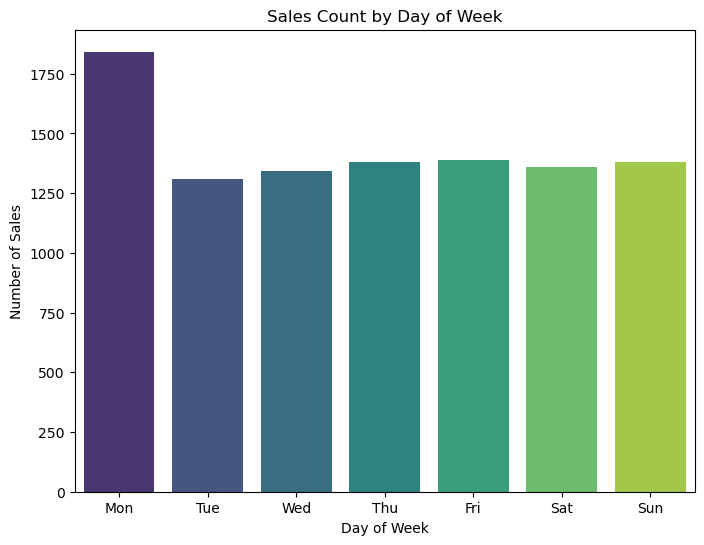

In [207]:
# Sales Based on day of the week
plt.figure(figsize=(8, 6))
sns.countplot(x='Day_of_week', data=data_encoded, palette='viridis')
plt.title('Sales Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sales')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

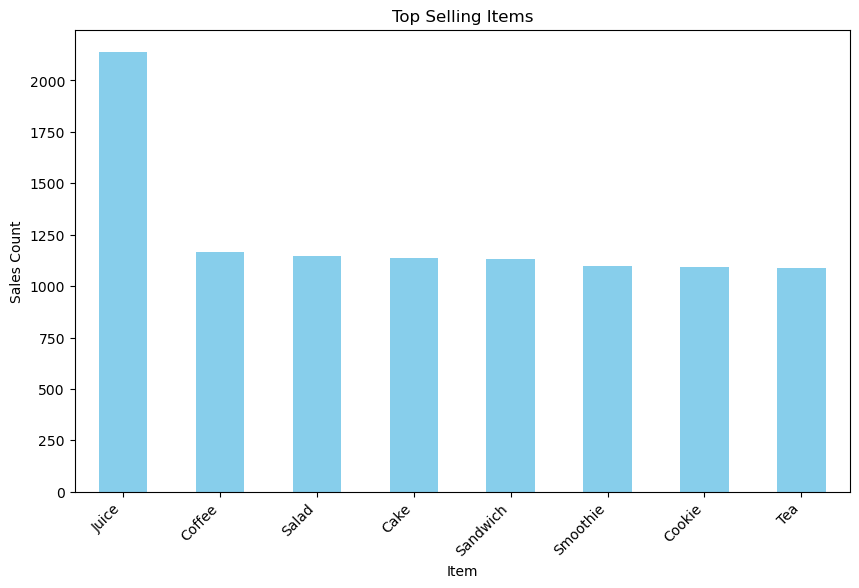

In [208]:
# num of times to buy each item & top items
top_items = cleaned_data['Item'].value_counts()

plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top Selling Items')
plt.xlabel('Item')
plt.ylabel('Sales Count')
plt.xticks(rotation=45, ha='right')
plt.show()

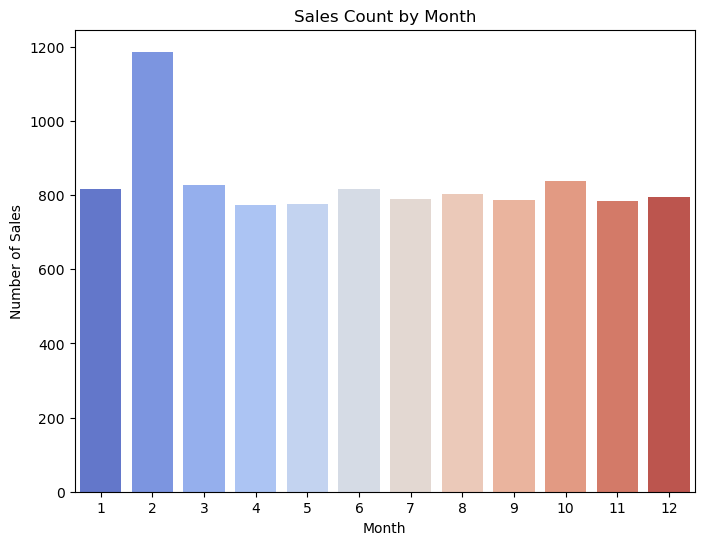

In [209]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Month', data=data_encoded, palette='coolwarm')
plt.title('Sales Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


## Modeling

In [223]:
data_encoded['Total Spent'] = pd.to_numeric(data_encoded['Total Spent'], errors='coerce')
monthly_sales = data_encoded.groupby(['Month', 'Item_Coffee','Item_Cookie','Item_Juice','Item_Salad','Item_Sandwich','Item_Smoothie','Item_Tea']).agg({'Total Spent': 'sum'}).reset_index()
monthly_sales

,Month,Item_Coffee,Item_Cookie,Item_Juice,Item_Salad,Item_Sandwich,Item_Smoothie,Item_Tea,Total Spent
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,831.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,406.5
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,752.0
3,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1316.0
4,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1549.0
...,...,...,...,...,...,...,...,...,...
91,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,978.0
92,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1248.0
93,12,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1634.0
94,12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,258.0


In [224]:
X = monthly_sales.drop(['Total Spent'], axis=1)
y = monthly_sales['Total Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

y_pred_xg = xg_model.predict(X_test)

mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print(f'Mean Squared Error (XGBoost): {mse_xg}')
print(f'R^2 Score (XGBoost): {r2_xg}')

Mean Squared Error (XGBoost): 25290.060973533582
R^2 Score (XGBoost): 0.8921634540080366


In [182]:
# Save Model for later
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xg_model, file)

In [183]:
# load model for testing
with open('xgboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)